les bibliothéques nécessaires

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math


les paramétres du problème

In [ ]:
# Nombre de nœuds
NUM_NODES=60
DEPOT=0
Depot = 0
# Nombre de véhicules
num_vehicules = 2

In [ ]:

# Fixer la graine pour garantir la reproductibilité
random.seed(42)
np.random.seed(42)

# Définir la région
region_size = 200
X_RANGE = (0, 200)
Y_RANGE = (0, 200)

# Générer les coordonnées pour les nœuds
NODE_COORDINATES = [(random.uniform(*X_RANGE), random.uniform(*Y_RANGE)) for _ in range(1, NUM_NODES + 1)]

# Ajouter les coordonnées du dépôt
depot_coordinates = (0, 0)
NODE_COORDINATES.insert(0, depot_coordinates)

# Afficher les coordonnées générées
for i, coord in enumerate(NODE_COORDINATES):
    print(f'Node {i}: ({coord[0]}, {coord[1]})')


Node 0: (0, 0)
Node 1: (127.88535969157675, 5.002151044533387)
Node 2: (55.00586367382385, 44.64214762976455)
Node 3: (147.29424283280247, 135.33989748458225)
Node 4: (178.43591354096907, 17.38776652588323)
Node 5: (84.38436393705409, 5.959443887614069)
Node 6: (43.72759496072067, 101.07105762067248)
Node 7: (5.307193936772725, 39.7675301373297)
Node 8: (129.97688755590465, 108.98829612064334)
Node 9: (44.088124408139336, 117.85313677518174)
Node 10: (161.88609133556534, 1.2997519356122034)
Node 11: (161.16385036656158, 139.62787899764538)
Node 12: (68.05010330359838, 31.09589996235631)
Node 13: (191.44261444135623, 67.31890902252535)
Node 14: (18.54916867602958, 19.3432753666928)
Node 15: (169.49887326949195, 120.74520627337822)
Node 16: (161.42565465487604, 145.9463573387636)
Node 17: (107.24561829094014, 194.62315279587412)
Node 18: (75.70687544167069, 110.4081262546454)
Node 19: (165.88093285059898, 123.70395047284921)
Node 20: (172.34138006215545, 115.47042905135241)
Node 21: (140

In [ ]:
# Fixer la durée à 30 pour tous les nœuds
DURATIONS = {i: 30 for i in range(1, NUM_NODES + 1)}


In [ ]:
# Fixer la graine pour garantir la reproductibilité
random.seed(42)

# Utiliser un dictionnaire pour stocker les fenêtres de temps
TIME_WINDOWS = {}

for i in range(1, NUM_NODES + 1):
    if i % 2 == 1:
        # Générer une fenêtre de temps pour le matin
        start_time = random.uniform(8.0, 16.0) - 0.25
        end_time = start_time + 0.5
    else:
        # Générer une fenêtre de temps pour le soir
        start_time = random.uniform(16.0, 22.0) - 0.25
        end_time = start_time + 0.5
    TIME_WINDOWS[i] = (start_time, end_time)

In [ ]:
# Afficher les fenêtres de temps générées
print("Fenêtres de temps générées:")
for node, time_window in TIME_WINDOWS.items():
    start_time, end_time = time_window
    print(f"{node}: ({start_time:.2f}, {end_time:.2f}),   # Nœud {node}")

Fenêtres de temps générées:
1: (12.87, 13.37),   # Nœud 1
2: (15.90, 16.40),   # Nœud 2
3: (9.95, 10.45),   # Nœud 3
4: (17.09, 17.59),   # Nœud 4
5: (13.64, 14.14),   # Nœud 5
6: (19.81, 20.31),   # Nœud 6
7: (14.89, 15.39),   # Nœud 7
8: (16.27, 16.77),   # Nœud 8
9: (11.13, 11.63),   # Nœud 9
10: (15.93, 16.43),   # Nœud 10
11: (9.50, 10.00),   # Nœud 11
12: (18.78, 19.28),   # Nœud 12
13: (7.96, 8.46),   # Nœud 13
14: (16.94, 17.44),   # Nœud 14
15: (12.95, 13.45),   # Nœud 15
16: (19.02, 19.52),   # Nœud 16
17: (9.51, 10.01),   # Nœud 17
18: (19.29, 19.79),   # Nœud 18
19: (14.23, 14.73),   # Nœud 19
20: (15.79, 16.29),   # Nœud 20
21: (14.20, 14.70),   # Nœud 21
22: (19.94, 20.44),   # Nœud 22
23: (10.47, 10.97),   # Nœud 23
24: (16.68, 17.18),   # Nœud 24
25: (15.41, 15.91),   # Nœud 25
26: (17.77, 18.27),   # Nœud 26
27: (8.49, 8.99),   # Nœud 27
28: (16.33, 16.83),   # Nœud 28
29: (14.53, 15.03),   # Nœud 29
30: (19.37, 19.87),   # Nœud 30
31: (14.21, 14.71),   # Nœud 31
32: (

Fonction calcul la distance entre deux paire du noeuds

In [ ]:
# Fonction pour calculer la distance euclidienne entre deux points
def euclidean_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

Utuliser un matrice du distance

In [ ]:
# Générer la matrice de distances
distance_matrix = [[0] * NUM_NODES for _ in range(NUM_NODES)]

for i in range(NUM_NODES):
    for j in range(NUM_NODES):
        if i != j:
            distance_matrix[i][j] = euclidean_distance(NODE_COORDINATES[i], NODE_COORDINATES[j])
        else:
            # Laisser la distance nulle entre un nœud et lui-même
            distance_matrix[i][j] = 0

# Afficher la matrice de distances
for row in distance_matrix:
    print(row)


[0, 127.98315021328507, 70.84184062756266, 200.0312021231333, 179.28109121142367, 84.5945379354413, 110.12475311940608, 40.12010419610028, 169.62440859145633, 125.82974434360608, 161.8913089792072, 213.23632724832922, 74.81825682344706, 202.93375800030122, 26.799887322216517, 208.10880057707303, 217.62026836030088, 222.2156480691947, 133.87115197906664, 206.92788899994622, 207.44871960807984, 141.2120882254335, 73.6703515731323, 49.217215018379406, 59.150862299315804, 146.58747988717164, 85.07106308452379, 194.79209164121116, 177.87528693965075, 149.7884273762698, 82.62851983355594, 235.69099720340364, 176.50945467584123, 229.1353505758052, 46.25729993381466, 82.75162891399832, 193.24517998389365, 186.23022154238666, 153.11752938189787, 204.64039840883086, 72.38415024171573, 123.96246769131965, 214.27334974615056, 91.13119310175448, 224.0266341593935, 20.47874415578189, 127.39096781727214, 179.5114210314149, 77.3741686308002, 225.585442292815, 259.53303537296426, 144.16265185778465, 17

k-means

In [ ]:
# Fonction pour vérifier si le fenetre du temps est respectée
def classify_nodes_morning_evening(TIME_WINDOWS):
    # Extraire les heures de début des fenêtres de temps pour chaque nœud
    heures_debut = [TIME[0] for TIME in TIME_WINDOWS.values()]

    # Définir les centroides pour le matin et le soir
    centroides = np.array([[8.0], [16.0]])

    # Convertir les heures de début en un format compatible avec KMeans
    heures_debut_array = np.array(heures_debut).reshape(-1, 1)

    # Appliquer KMeans
    kmeans = KMeans(n_clusters=2, init=centroides, n_init=1, random_state=42)
    kmeans.fit(heures_debut_array)

    # Obtenir les étiquettes de cluster attribuées à chaque nœud
    labels = kmeans.labels_

    # Initialiser deux listes pour les nœuds du matin et du soir
    noeuds_matin = []
    noeuds_soir = []

    # Parcourir les nœuds et les étiquettes attribuées par KMeans
    for node, label in zip(TIME_WINDOWS.keys(), labels):
        if label == 0:
            # Noeud du matin
            noeuds_matin.append(node)
        else:
            # Noeud du soir
            noeuds_soir.append(node)

    # Retourner les nœuds classés en deux catégories
    return noeuds_matin, noeuds_soir

# Utiliser la fonction avec votre dictionnaire de fenêtres de temps
noeuds_matin, noeuds_soir = classify_nodes_morning_evening(TIME_WINDOWS)

# Afficher les résultats
print("Nœuds du matin :", noeuds_matin)
print("Nœuds du soir :", noeuds_soir)


Nœuds du matin : [1, 3, 5, 9, 11, 13, 15, 17, 23, 27, 33, 35, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59]
Nœuds du soir : [2, 4, 6, 7, 8, 10, 12, 14, 16, 18, 19, 20, 21, 22, 24, 25, 26, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60]


Fenetre du temps

In [ ]:
def check_time_window(node, current_time, classification, TIME_WINDOWS):
    if node not in TIME_WINDOWS:
        return False  # Le nœud n'a pas de fenêtre de temps définie

    start_time, end_time = TIME_WINDOWS[node]

    if classification == 'Matin' and start_time <= current_time <= end_time:
        return True  # La fenêtre de temps du matin est respectée
    elif classification == 'Soir' and start_time <= current_time <= end_time:
        return True  # La fenêtre de temps du soir est respectée
    else:
        return False  # La fenêtre de temps n'est pas respectée

Générer des solution intiales (matin et soir )

In [ ]:
def generate_initial_solution(TIME_WINDOWS, num_vehicules, distance_matrix):
    MORNING_START = 8.0
    EVENING_START = 16.0
    DEPOT = 0  # DEPOT est défini

    # Classer les nœuds en matin et soir
    noeuds_matin, noeuds_soir = classify_nodes_morning_evening(TIME_WINDOWS)

    # Initialiser les solutions pour le matin et le soir avec le Dépôt
    solution_matin = [DEPOT]
    solution_soir = [DEPOT]

    # Générer la solution pour le matin
    for classification in ['Matin'] * num_vehicules:
        current_time_matin = MORNING_START
        while len(noeuds_matin) > 0:
            current_node = solution_matin[-1]
            feasible_nodes = [node for node in noeuds_matin if (current_node != node and node not in solution_matin)]

            if not feasible_nodes:
                # Ajouter le dépôt à la fin de la route du matin
                solution_matin.append(DEPOT)
                current_time_matin = MORNING_START
            else:
                # Sélectionner le nœud respectant la plage horaire
                next_node = min(feasible_nodes, key=lambda node: max(TIME_WINDOWS[node]))
                solution_matin.append(next_node)
                current_time_matin += DURATIONS[next_node] + distance_matrix[current_node - 1][next_node - 1]
                # Créer une nouvelle liste sans le nœud ajouté
                noeuds_matin = [node for node in noeuds_matin if node != next_node]

    # Ajouter le dépôt à la fin de la route du matin (s'il n'a pas déjà été ajouté)
    if solution_matin[-1] != DEPOT:
        solution_matin.append(DEPOT)

    # Générer la solution pour le soir
    for classification in ['Soir'] * num_vehicules:
        current_time_soir = EVENING_START
        while len(noeuds_soir) > 0:
            current_node = solution_soir[-1]
            feasible_nodes = [node for node in noeuds_soir if (current_node != node and node not in solution_soir)]

            if not feasible_nodes:
                # Ajouter le dépôt à la fin de la route du soir
                solution_soir.append(DEPOT)
                current_time_soir = EVENING_START
            else:
                # Sélectionner le nœud respectant la plage horaire
                next_node = min(feasible_nodes, key=lambda node: max(TIME_WINDOWS[node]))
                solution_soir.append(next_node)
                current_time_soir += DURATIONS[next_node] + distance_matrix[current_node - 1][next_node - 1]
                # Créer une nouvelle liste sans le nœud ajouté
                noeuds_soir = [node for node in noeuds_soir if node != next_node]

    # Ajouter le dépôt à la fin de la route du soir
    if solution_soir[-1] != DEPOT:
        solution_soir.append(DEPOT)

    # Vérifier si tous les nœuds matin et soir ont été inclus dans les solutions
    if not set(noeuds_matin) and not set(noeuds_soir):
        return solution_matin, solution_soir, set(noeuds_matin), set(noeuds_soir)
    else:
        raise ValueError("Attention : Tous les nœuds n'ont pas été inclus dans la solution.")

# Utiliser la fonction pour générer une solution initiale
solution_matin, solution_soir, missing_nodes_matin, missing_nodes_soir = generate_initial_solution(TIME_WINDOWS, num_vehicules, distance_matrix)

# Afficher les solutions générées
print("Solution du matin :", solution_matin)
print("Solution du soir :", solution_soir)

# Afficher les nœuds manquants, le cas échéant
if missing_nodes_matin or missing_nodes_soir:
    print("Nœuds manquants dans la solution matin :", missing_nodes_matin)
    print("Nœuds manquants dans la solution soir :", missing_nodes_soir)


Solution du matin : [0, 13, 45, 27, 47, 59, 57, 11, 17, 43, 53, 3, 23, 51, 35, 9, 33, 49, 1, 55, 15, 41, 5, 0]
Solution du soir : [0, 21, 31, 19, 37, 29, 39, 7, 25, 20, 2, 10, 42, 8, 28, 24, 14, 52, 4, 46, 48, 44, 26, 50, 60, 12, 16, 36, 40, 18, 30, 56, 38, 6, 22, 58, 32, 54, 34, 0]


In [ ]:
import time

def measure_execution_time(TIME_WINDOWS, num_vehicules, distance_matrix):
    start_time = time.time()

    # Appel de la fonction dont on veut mesurer le temps d'exécution
    solution_matin, solution_soir, missing_nodes_matin, missing_nodes_soir = generate_initial_solution(TIME_WINDOWS, num_vehicules, distance_matrix)

    end_time = time.time()

    execution_time = end_time - start_time
    return solution_matin, solution_soir, missing_nodes_matin, missing_nodes_soir, execution_time

# Utiliser la fonction pour mesurer le temps d'exécution
solution_matin, solution_soir, missing_nodes_matin, missing_nodes_soir, execution_time = measure_execution_time(TIME_WINDOWS, num_vehicules, distance_matrix)



# Afficher le temps d'exécution
print(f"Temps d'exécution : {execution_time} secondes")


Temps d'exécution : 0.006595611572265625 secondes


Fonction du visualisation

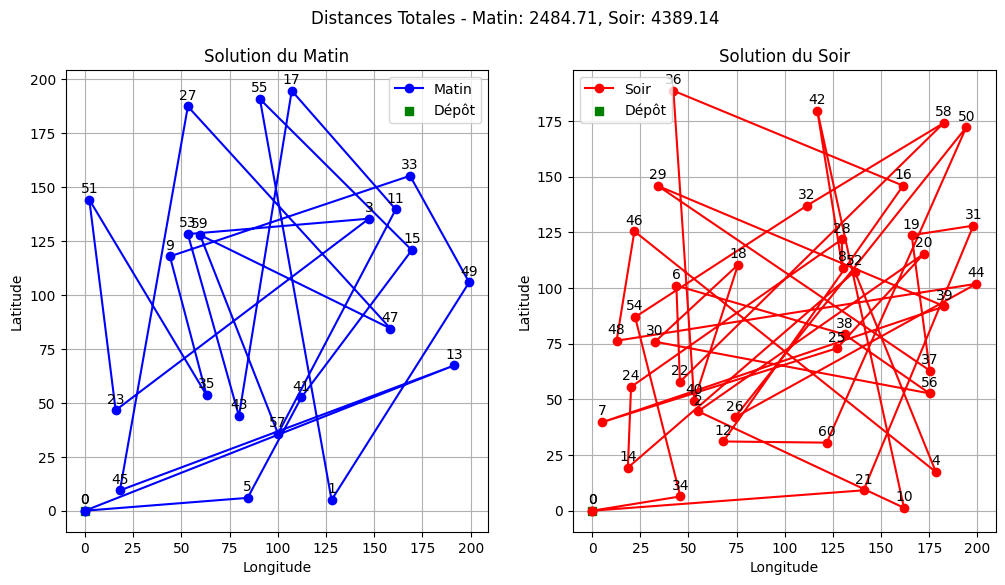

In [ ]:
import matplotlib.pyplot as plt

def plot_solution(solution_matin, solution_soir, distance_matrix, NODE_COORDINATES):
    # Fonction pour calculer la distance totale d'une solution
    def calculate_total_distance(solution, distance_matrix):
        total_distance = 0
        for i in range(len(solution) - 1):
            total_distance += distance_matrix[solution[i] - 1][solution[i + 1] - 1]
        return total_distance

    # Plot de la solution du matin
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Solution du Matin')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)

    matin_x = [NODE_COORDINATES[node][0] for node in solution_matin]
    matin_y = [NODE_COORDINATES[node][1] for node in solution_matin]

    plt.plot(matin_x, matin_y, marker='o', linestyle='-', color='b', label='Matin')
    plt.scatter(matin_x[0], matin_y[0], marker='s', color='g', label='Dépôt')

    # Annoter les nœuds avec leur numéro
    for i, node in enumerate(solution_matin):
        plt.annotate(str(node), (matin_x[i], matin_y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.legend()

    # Plot de la solution du soir
    plt.subplot(1, 2, 2)
    plt.title('Solution du Soir')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)

    soir_x = [NODE_COORDINATES[node][0] for node in solution_soir]
    soir_y = [NODE_COORDINATES[node][1] for node in solution_soir]

    plt.plot(soir_x, soir_y, marker='o', linestyle='-', color='r', label='Soir')
    plt.scatter(soir_x[0], soir_y[0], marker='s', color='g', label='Dépôt')

    # Annoter les nœuds avec leur numéro
    for i, node in enumerate(solution_soir):
        plt.annotate(str(node), (soir_x[i], soir_y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.legend()

    # Afficher les distances totales
    total_distance_matin = calculate_total_distance(solution_matin, distance_matrix)
    total_distance_soir = calculate_total_distance(solution_soir, distance_matrix)

    plt.suptitle(f'Distances Totales - Matin: {total_distance_matin:.2f}, Soir: {total_distance_soir:.2f}')
    plt.show()

# Appeler la fonction plot avec les solutions générées
plot_solution(solution_matin, solution_soir, distance_matrix, NODE_COORDINATES)


Algorithme plus proche voisin

In [ ]:
def generer_voisin(solution, distance_matrix, TIME_WINDOWS):
    # Copier la solution pour ne pas la modifier directement
    voisin = solution.copy()

    # Créer une liste de nœuds non visités
    non_visites = voisin[1:-1]

    # Sélectionner le premier nœud aléatoire
    premier_noeud = random.choice(non_visites)
    voisin.remove(premier_noeud)
    voisin.append(premier_noeud)

    while non_visites:
        # Calculer la distance minimale entre le dernier nœud ajouté et les nœuds non visités
        dernier_noeud = voisin[-1]
        distances = distance_matrix[dernier_noeud-1]
        distances_non_visites = [distances[i-1] for i in non_visites]
        index_plus_proche = distances_non_visites.index(min(distances_non_visites))
        plus_proche = non_visites[index_plus_proche]

        # Vérifier si le nœud le plus proche respecte les contraintes de plage horaire
        if TIME_WINDOWS[plus_proche][0] <= sum(distance_matrix[voisin[-1]-1][plus_proche-1] for voisin[-1] in voisin[:-1]) <= TIME_WINDOWS[plus_proche][1]:
            voisin.append(plus_proche)
            non_visites.remove(plus_proche)
        else:
            # Rechercher un nœud qui viole les contraintes de plage horaire mais peut être déplacé pour les respecter
            for node in non_visites:
                if TIME_WINDOWS[node][0] <= sum(distance_matrix[voisin[-1]-1][node-1] for voisin[-1] in voisin[:-1]) <= TIME_WINDOWS[node][1]:
                    voisin.append(node)
                    non_visites.remove(node)
                    break
            else:
                # Aucun noeud ne peut être ajouté tout en respectant les contraintes de plage horaire
                break

    # Assurer que le nœud 0 est le point de départ et d'arrivée
    voisin.insert(0, 0)
    voisin.append(0)

    # Supprimer les nœuds 0 sauf le premier et le dernier
    voisin = [voisin[0]] + [node for node in voisin[1:-1] if node != 0] + [voisin[-1]]

    return voisin


Affichage des résultats

In [ ]:
#utilisation pour générer un voisin à partir de la solution du matin
voisin_matin = generer_voisin(solution_matin, distance_matrix, TIME_WINDOWS)

# Afficher la solution du matin et son voisin
print("Solution du matin :", solution_matin)
print("Voisin du matin :", voisin_matin)

Solution du matin : [0, 13, 45, 27, 47, 59, 57, 11, 17, 43, 53, 3, 23, 51, 35, 9, 33, 49, 1, 55, 15, 41, 5, 0]
Voisin du matin : [0, 13, 45, 27, 47, 59, 57, 11, 17, 43, 53, 3, 23, 51, 35, 9, 33, 49, 1, 55, 15, 5, 0]


In [ ]:
# générer un voisin à partir de la solution du soir
voisin_soir = generer_voisin(solution_soir, distance_matrix, TIME_WINDOWS)

# Afficher la solution du soir et son voisin
print("Solution du soir :", solution_soir)
print("Voisin du soir :", voisin_soir)


Solution du soir : [0, 21, 31, 19, 37, 29, 39, 7, 25, 20, 2, 10, 42, 8, 28, 24, 14, 52, 4, 46, 48, 44, 26, 50, 60, 12, 16, 36, 40, 18, 30, 56, 38, 6, 22, 58, 32, 54, 34, 0]
Voisin du soir : [0, 21, 31, 19, 37, 29, 39, 7, 25, 20, 2, 10, 42, 8, 28, 24, 14, 52, 4, 46, 48, 44, 26, 50, 60, 12, 16, 36, 40, 18, 30, 56, 38, 6, 22, 58, 54, 34, 0]


In [ ]:

def measure_execution_time_for_neighbors(solution_matin, solution_soir, distance_matrix, TIME_WINDOWS):
    # Mesurer le temps d'exécution pour le voisin du matin
    start_time_matin = time.time()
    voisin_matin = generer_voisin(solution_matin, distance_matrix, TIME_WINDOWS)
    end_time_matin = time.time()
    execution_time_matin = end_time_matin - start_time_matin

    # Mesurer le temps d'exécution pour le voisin du soir
    start_time_soir = time.time()
    voisin_soir = generer_voisin(solution_soir, distance_matrix, TIME_WINDOWS)
    end_time_soir = time.time()
    execution_time_soir = end_time_soir - start_time_soir

    return voisin_matin, execution_time_matin, voisin_soir, execution_time_soir
# Appel de la fonction pour mesurer le temps d'exécution et obtenir les voisins
voisin_matin, execution_time_matin, voisin_soir, execution_time_soir = measure_execution_time_for_neighbors(solution_matin, solution_soir, distance_matrix, TIME_WINDOWS)

# Afficher les solutions et le temps d'exécution

print("Temps d'exécution pour le matin :", execution_time_matin, "secondes")

print("Temps d'exécution pour le soir :", execution_time_soir, "secondes")

Temps d'exécution pour le matin : 0.02799820899963379 secondes
Temps d'exécution pour le soir : 0.001207113265991211 secondes


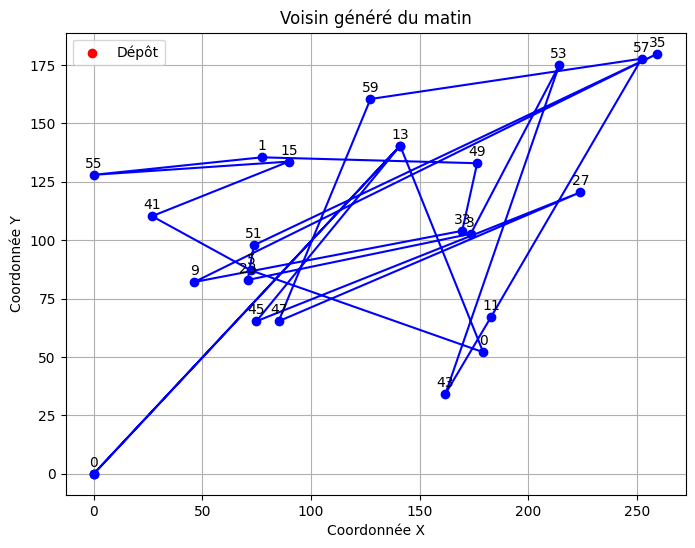

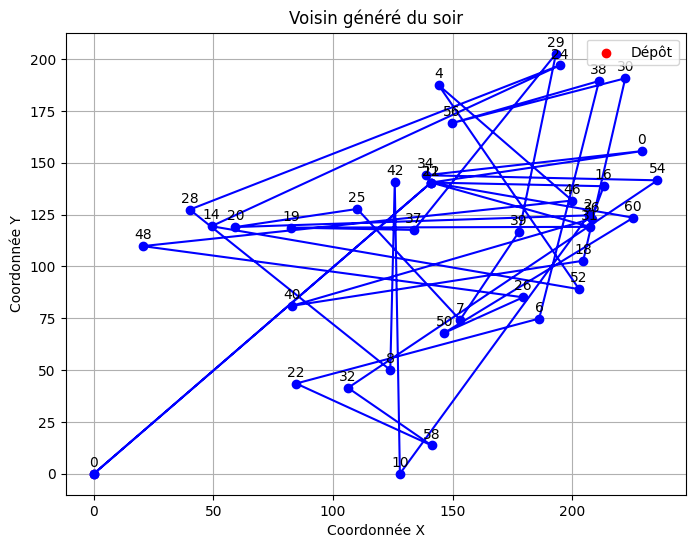

In [ ]:
def plot_solution(solution, title="Solution"):
    x_coords = [0]  # Coordonnée X du dépôt
    y_coords = [0]  # Coordonnée Y du dépôt

    # Ajouter les coordonnées du dépôt au début de la route
    for node in solution:
        x_coords.append(distance_matrix[node - 1][0])  # Supposons que la première colonne de la matrice est la coordonnée x
        y_coords.append(distance_matrix[node - 1][1])  # Supposons que la deuxième colonne de la matrice est la coordonnée y

    # Ajouter les coordonnées du dépôt à la fin de la route
    x_coords.append(0)
    y_coords.append(0)

    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b')
    plt.scatter(0, 0, marker='o', color='red', label='Dépôt')  # Marquer le dépôt en rouge
    plt.title(title)
    plt.xlabel('Coordonnée X')
    plt.ylabel('Coordonnée Y')

    # Marquer les nœuds avec des annotations pour afficher les numéros
    for i, node in enumerate(solution):
        plt.annotate(str(node), (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.legend()
    plt.grid(True)
    plt.show()

# Utilisation de la fonction pour visualiser le voisin généré à partir de la solution du matin et soir
plot_solution(voisin_matin, title="Voisin généré du matin")
plot_solution(voisin_soir, title="Voisin généré du soir")


Fonction d'evaluation

In [ ]:
def evaluate_solution(solution, distance_matrix, TIME_WINDOWS):
    total_distance = 0
    current_time = 8.0  # Heure de départ le matin

    for i in range(1, len(solution) - 1):
        node = solution[i]

        # Vérifier si l'indice du nœud est valide dans la matrice de distances
        if 0 < solution[i - 1] <= len(distance_matrix) and 0 < node <= len(distance_matrix):
            current_time += distance_matrix[solution[i - 1] - 1][node - 1]  # Ajouter le temps de trajet

            if current_time < TIME_WINDOWS[node][0]:
                current_time = TIME_WINDOWS[node][0]
            elif current_time > TIME_WINDOWS[node][1]:
                # Le nœud doit être déplacé au début de sa fenêtre temporelle
                current_time += TIME_WINDOWS[node][0] - current_time

            total_distance += distance_matrix[solution[i - 1] - 1][node - 1]

    # Ajouter la distance du dernier nœud au dépôt
    total_distance += distance_matrix[solution[-2] - 1][solution[-1] - 1]

    return total_distance

# Utilisation pour évaluer la solution du matin et son voisin
evaluation_voisin_matin = evaluate_solution(voisin_matin, distance_matrix, TIME_WINDOWS)
# Utilisation pour évaluer la solution du soir et son voisin
evaluation_voisin_soir = evaluate_solution(voisin_soir, distance_matrix, TIME_WINDOWS)
# Afficher les évaluations
print("Évaluation du voisin du matin :", evaluation_voisin_matin)
# Afficher les évaluations
print("Évaluation du voisin du soir :", evaluation_voisin_soir)


Évaluation du voisin du matin : 2371.081217199587
Évaluation du voisin du soir : 4165.232719188707


Fonction generer voisin contraintes et fonction d'evaluation

In [ ]:
def generer_voisin_avec_contraintes(solution, distance_matrix, TIME_WINDOWS):
    voisin = solution.copy()

    index1, index2 = random.sample(range(1, len(voisin) - 1), 2)
    voisin[index1], voisin[index2] = voisin[index2], voisin[index1]

    # Vérifier et corriger les contraintes temporelles lors de la génération du voisin
    current_time = 8.0

    for i in range(1, len(voisin) - 1):
        node = voisin[i]

        if 0 < voisin[i - 1] <= len(distance_matrix) and 0 < node <= len(distance_matrix):
            travel_time = distance_matrix[voisin[i - 1] - 1][node - 1]

            # Vérifier la plage horaire du nœud
            if current_time + travel_time > TIME_WINDOWS[node][1]:
                # Si le temps de trajet dépasse la fin de la plage horaire, ne pas effectuer l'échange
                return solution

            # Mettre à jour le temps actuel en tenant compte du temps de trajet
            current_time += travel_time

            if current_time < TIME_WINDOWS[node][0]:
                # Si le temps actuel est avant le début de la plage horaire, le mettre à jour
                current_time = TIME_WINDOWS[node][0]

    return voisin


In [ ]:
def evaluer_solution_avec_contraintes(solution, matrice_distances, TIME_WINDOWS):
    distance_totale = 0
    temps_actuel = 8.0  # Début de la journée

    for i in range(1, len(solution)):
        noeud_depart = solution[i - 1]
        noeud_arrivee = solution[i]

        if 0 < noeud_depart <= len(matrice_distances) and 0 < noeud_arrivee <= len(matrice_distances):
            distance_trajet = matrice_distances[noeud_depart - 1][noeud_arrivee - 1]
            distance_totale += distance_trajet

            # Vérifier la plage horaire du nœud d'arrivée
            if temps_actuel + distance_trajet > TIME_WINDOWS[noeud_arrivee][1]:
                # Si le temps de trajet dépasse la fin de la plage horaire, pénaliser l'évaluation
                return float('inf')  # Utilisation de l'infini pour indiquer une solution non valide

            # Mettre à jour le temps actuel en tenant compte du temps de trajet
            temps_actuel += distance_trajet

            if temps_actuel < TIME_WINDOWS[noeud_arrivee][0]:
                # Si le temps actuel est avant le début de la plage horaire, pénaliser l'évaluation
                return float('inf')  # Utilisation de l'infini pour indiquer une solution non valide

    return distance_totale


Algorithme recherche tabou

In [ ]:
def recherche_tabou_avec_contraintes(solution_initiale, distance_matrix, TIME_WINDOWS, tabou_size=5, max_iterations=100):
    meilleure_solution = solution_initiale.copy()
    meilleure_evaluation = evaluate_solution(meilleure_solution, distance_matrix, TIME_WINDOWS)

    solution_actuelle = solution_initiale.copy()
    evaluation_actuelle = meilleure_evaluation

    tabou_list = []

    for _ in range(max_iterations):
        voisin = generer_voisin_avec_contraintes(solution_actuelle, distance_matrix, TIME_WINDOWS)

        # Évaluer le voisin
        evaluation_voisin = evaluate_solution(voisin, distance_matrix, TIME_WINDOWS)

        # Accepter le voisin si son évaluation est meilleure et n'est pas dans la liste tabou
        if evaluation_voisin < evaluation_actuelle and voisin not in tabou_list:
            solution_actuelle = voisin.copy()
            evaluation_actuelle = evaluation_voisin

            # Mettre à jour la meilleure solution si nécessaire
            if evaluation_actuelle < meilleure_evaluation:
                meilleure_solution = solution_actuelle.copy()
                meilleure_evaluation = evaluation_actuelle

            # Ajouter le voisin à la liste tabou
            tabou_list.append(voisin.copy())

            # Supprimer les anciens mouvements de la liste tabou s'il dépasse la taille maximale
            if len(tabou_list) > tabou_size:
                tabou_list.pop(0)

    return meilleure_solution


In [ ]:
# Utilisation de la nouvelle fonction recherche_tabou_avec_contraintes
solution_matin_optimisee = recherche_tabou_avec_contraintes(solution_matin, distance_matrix, TIME_WINDOWS)
solution_soir_optimisee = recherche_tabou_avec_contraintes(solution_soir, distance_matrix, TIME_WINDOWS)

# Afficher les solutions optimisées
print("Solution du matin optimisée :", solution_matin_optimisee)
print("Évaluation du matin optimisée :", evaluate_solution(solution_matin_optimisee, distance_matrix,TIME_WINDOWS))

print("\n")

print("Solution du soir optimisée :", solution_soir_optimisee)
print("Évaluation du soir optimisée :", evaluate_solution(solution_soir_optimisee, distance_matrix,TIME_WINDOWS))


Solution du matin optimisée : [0, 13, 45, 27, 47, 59, 57, 11, 17, 43, 53, 3, 23, 51, 35, 9, 33, 49, 1, 55, 15, 41, 5, 0]
Évaluation du matin optimisée : 2387.6573177443674


Solution du soir optimisée : [0, 21, 31, 19, 37, 29, 39, 7, 25, 20, 2, 10, 42, 8, 28, 24, 14, 52, 4, 46, 48, 44, 26, 50, 60, 12, 16, 36, 40, 18, 30, 56, 38, 6, 22, 58, 32, 54, 34, 0]
Évaluation du soir optimisée : 4275.812289071129


In [ ]:
def measure_execution_time(function, *args):
    start_time = time.time()
    result = function(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time



# Mesurer le temps d'exécution pour l'évaluation des solutions du matin et du soir
_, evaluation_time_matin = measure_execution_time(evaluate_solution, solution_matin, distance_matrix, TIME_WINDOWS)
_, evaluation_time_soir = measure_execution_time(evaluate_solution, solution_soir, distance_matrix, TIME_WINDOWS)

# Mesurer le temps d'exécution pour la génération des voisins du matin et du soir
_, generer_voisin_time_matin = measure_execution_time(generer_voisin_avec_contraintes, solution_matin, distance_matrix, TIME_WINDOWS)
_, generer_voisin_time_soir = measure_execution_time(generer_voisin_avec_contraintes, solution_soir, distance_matrix, TIME_WINDOWS)

# Mesurer le temps d'exécution pour l'optimisation par recherche tabou
_, tabou_time_matin = measure_execution_time(recherche_tabou_avec_contraintes, solution_matin, distance_matrix, TIME_WINDOWS)
_, tabou_time_soir = measure_execution_time(recherche_tabou_avec_contraintes, solution_soir, distance_matrix, TIME_WINDOWS)

# Afficher les temps d'exécution
print("Temps d'exécution pour l'évaluation du matin :", evaluation_time_matin, "secondes")
print("Temps d'exécution pour l'évaluation du soir :", evaluation_time_soir, "secondes")

print("Temps d'exécution pour la génération du voisin du matin :", generer_voisin_time_matin, "secondes")
print("Temps d'exécution pour la génération du voisin du soir :", generer_voisin_time_soir, "secondes")

print("Temps d'exécution pour l'optimisation du matin par recherche tabou :", tabou_time_matin, "secondes")
print("Temps d'exécution pour l'optimisation du soir par recherche tabou :", tabou_time_soir, "secondes")

Temps d'exécution pour l'évaluation du matin : 4.863739013671875e-05 secondes
Temps d'exécution pour l'évaluation du soir : 0.004155397415161133 secondes
Temps d'exécution pour la génération du voisin du matin : 5.054473876953125e-05 secondes
Temps d'exécution pour la génération du voisin du soir : 2.1457672119140625e-05 secondes
Temps d'exécution pour l'optimisation du matin par recherche tabou : 0.004196882247924805 secondes
Temps d'exécution pour l'optimisation du soir par recherche tabou : 0.01593303680419922 secondes


Fonction du visualisation

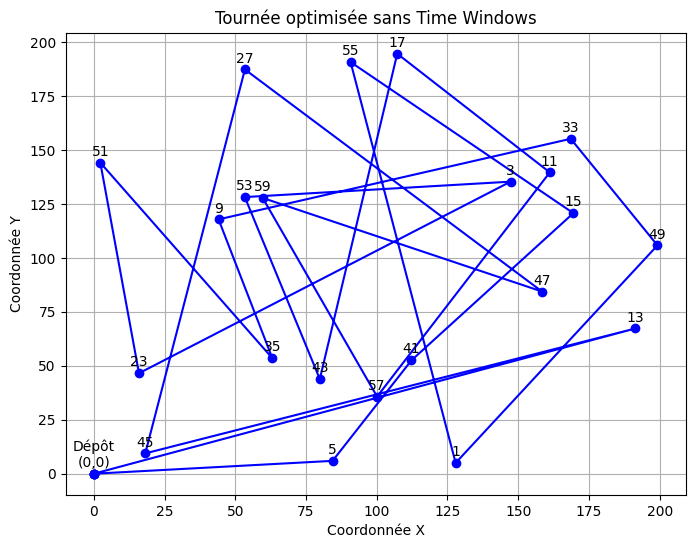

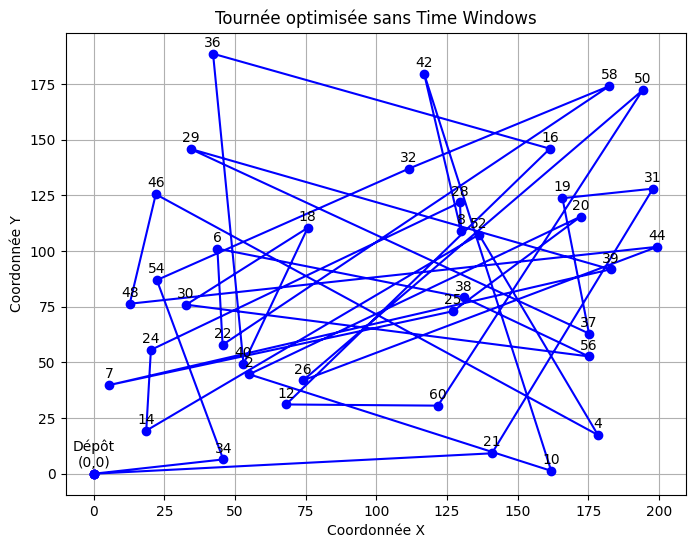

In [ ]:
def plot_solution_with_node_numbers(solution, distance_matrix, NODE_COORDINATES):
    x_coords = [0]  # Coordonnée X du dépôt
    y_coords = [0]  # Coordonnée Y du dépôt

    for node in solution:
        x_coords.append(NODE_COORDINATES[node][0])
        y_coords.append(NODE_COORDINATES[node][1])

    x_coords.append(0)  # Retour au dépôt
    y_coords.append(0)  # Retour au dépôt

    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b')
    plt.scatter(0, 0, marker='o', color='red')  # Marquer le dépôt en rouge
    plt.title('Tournée optimisée sans Time Windows')
    plt.xlabel('Coordonnée X')
    plt.ylabel('Coordonnée Y')

    # Marquer le dépôt avec une annotation
    plt.annotate("Dépôt\n(0,0)", (0, 0), textcoords="offset points", xytext=(0, 5), ha='center')

    # Marquer les nœuds avec des annotations pour afficher les numéros
    for i, node in enumerate(solution):
        if node != 0:  # Exclure le dépôt
            plt.annotate(str(node), (x_coords[i + 1], y_coords[i + 1]), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.grid(True)
    plt.show()

# Utilisation de la nouvelle fonction pour les solutions optimisées du matin et du soir
plot_solution_with_node_numbers(solution_matin_optimisee, distance_matrix, NODE_COORDINATES)
plot_solution_with_node_numbers(solution_soir_optimisee, distance_matrix, NODE_COORDINATES)
